## Basketball Court Survey - Data Analysis

#### Surveying procedure
- We surveyed the basketball court that is beside KMITL stadium since 22 April 2019 to 28 April 2019.(1 week)
- In each day, we divided data collection in every 30 minutes interval from 17:00 to 19:00
- In each interval, we collected total users, gender, age(approximate by eye) and activities whether they played basketball or not.

#### Note
- In 26 APR 2019, trash burning near the basketball court, we considered that this could affect data.

## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("survey-basketball-court-usage.csv")

data.head()

,Date,Time Interval,Total User,Playing,Not Playing,Male,Female,Children,Teenager,Adult,Elder
0,22-Apr-19,17:00-17:30,4,4,0,2,2,0,4,0,0
1,22-Apr-19,17:30-18:00,4,3,1,4,0,0,4,0,0
2,22-Apr-19,18:00-18:30,9,9,0,9,0,1,8,0,0
3,22-Apr-19,18:30-19:00,19,13,6,17,2,0,15,2,2
4,23-Apr-19,17:00-17:30,1,1,0,1,0,0,1,0,0


## Data Exploration

Total user distribution(in each time interval)

Average User : 11.214285714285714
Median : 9.5
User range : 32.0 ( 0.5 - 32.5 )


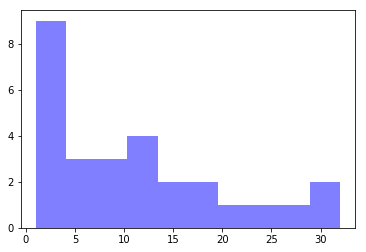

In [2]:
totalUser = data['Total User']
avgTotalUser = totalUser.mean()
sdTotalUser = totalUser.std(ddof=1)
medTotalUser = totalUser.median()
minTotalUser, maxTotalUser = totalUser.min() - 0.5, totalUser.max() + 0.5

print('Average User :', avgTotalUser)
print('Median :', medTotalUser)
print('User range :', maxTotalUser - minTotalUser, '(', minTotalUser, '-', maxTotalUser, ')')

n, bins, patches = plt.hist(totalUser, 10, facecolor='blue', alpha=0.5)

People that uses basketball court, compare by ages

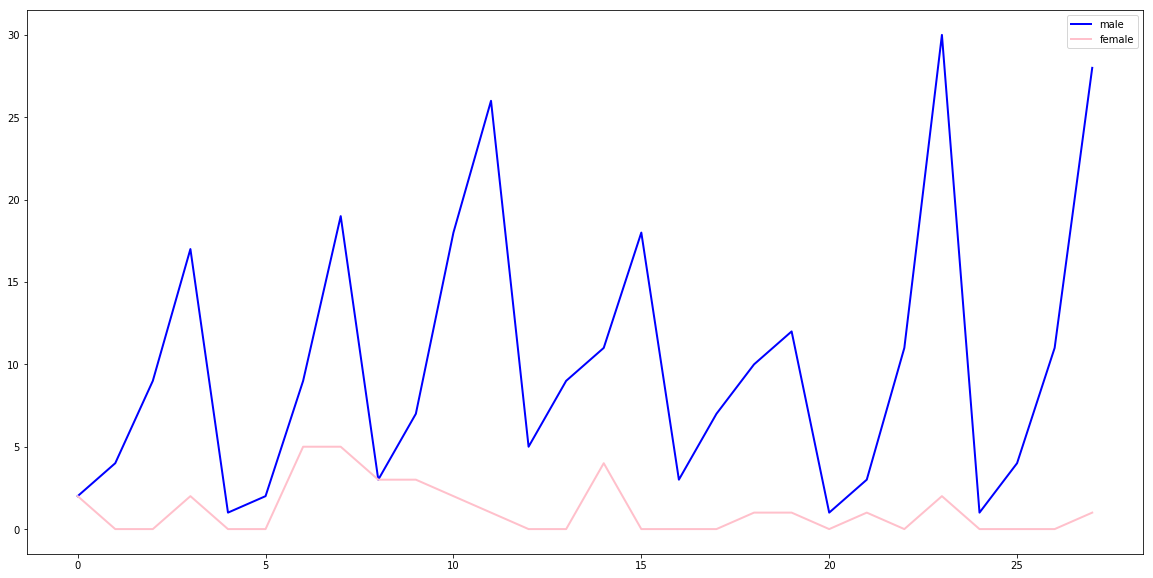

In [3]:
genderData = pd.DataFrame({'x':range(0,28),'male':data['Male'], 'female': data['Female']})

plt.figure(figsize=(20,10))
plt.plot('x', 'male', data=genderData, color='blue', linewidth=2)
plt.plot('x', 'female', data=genderData, color='pink', linewidth=2)
plt.legend()

People that uses basketball court, compare by gender

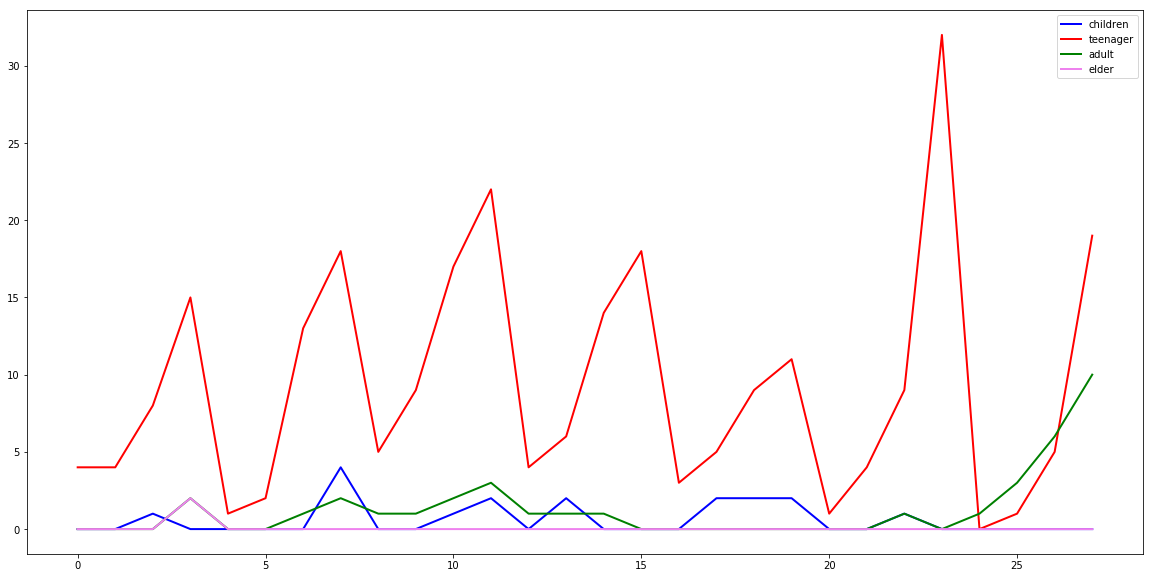

In [4]:
ageData = pd.DataFrame({'x':range(0,28), 'children':data['Children'], 'teenager':data['Teenager'], 'adult':data['Adult'], 'elder':data['Elder']})

plt.figure(figsize=(20,10))
plt.plot('x', 'children', data=ageData, color='blue', lineWidth=2)
plt.plot('x', 'teenager', data=ageData, color='red', lineWidth=2)
plt.plot('x', 'adult', data=ageData, color='green', lineWidth=2)
plt.plot('x', 'elder', data=ageData, color='violet', lineWidth=2)
plt.legend()

### Relationship between total users and users who played basketball

In [5]:
def estimate_coefficients(x, y):
    # size of dataset
    n = np.size(x)
    
    # mean of x and y
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    # cross-deviation and deviation about x
    SS_xy = np.sum(y*x - n*mean_y*mean_x)
    SS_xx = np.sum(x*x - n*mean_x*mean_x)
    SS_yy = np.sum(y*y - n*mean_y*mean_y)
    
    # calculating regression coefficient
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1*mean_x

    # calculating coeffient of determination
    R2 = (SS_xy * SS_xy) / (SS_xx * SS_yy)
    
    return (b_0, b_1, R2)

def plot_regression_line(x, y, x_label, y_label, b):
    plt.figure(figsize=(10, 10))
    # plotting the points as per dataset on a graph
    plt.scatter(x, y)
    
    # predicted response vector
    y_pred = b[0] + b[1]*x
    
    # plotting the regression line
    plt.plot(x, y_pred, color='g')
    
    # putting labels for x and y axis
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

Regression model : y = ( 8.7879937235719 ) + ( -0.016792662231459587 )x
Estimated coefficients:
b_0 = -0.016792662231459587 
b_1= 0.7721980717913404
Coefficient of determination :  1.0020033020306216


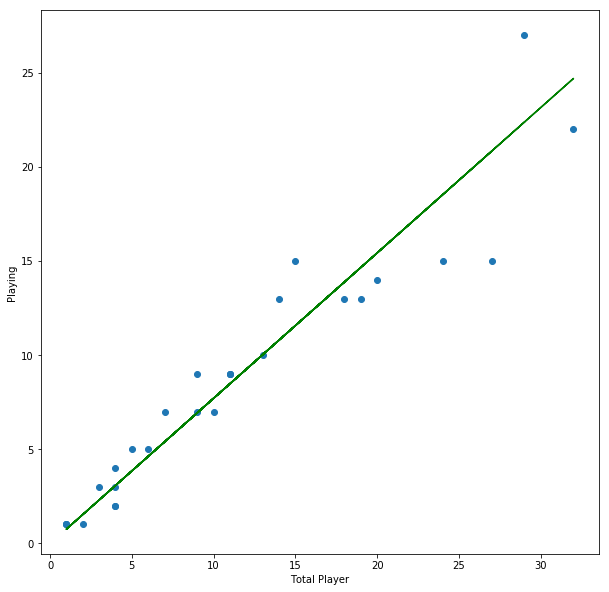

In [6]:
b = estimate_coefficients(data['Total User'], data['Playing'])

print("Regression model : y = (", data['Playing'].mean() - b[0]*data['Playing'].mean(), ') + (', b[0],')x')
print("Estimated coefficients:\nb_0 = {} \nb_1= {}".format(b[0], b[1]))
print("Coefficient of determination : ", b[2])

plot_regression_line(data['Total User'], data['Playing'], 'Total Player', 'Playing', b)

### Relationship between total users and users who did not played basketball

Regression model : y = ( 2.528247439976249 ) + ( 0.0167926622314587 )x
Estimated coefficients:
b_0 = 0.0167926622314587 
b_1= 0.22780192820865977
Coefficient of determination :  1.0235132899205297


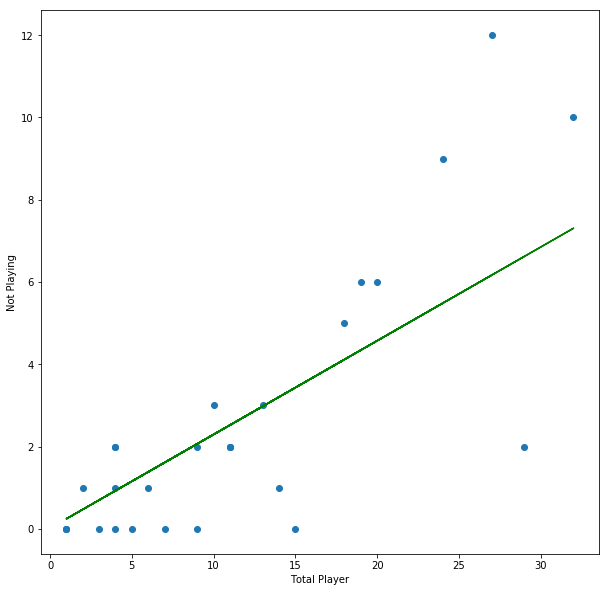

In [7]:
b = estimate_coefficients(data['Total User'], data['Not Playing'])

print("Regression model : y = (", data['Not Playing'].mean() - b[0]*data['Not Playing'].mean(), ') + (', b[0],')x')
print("Estimated coefficients:\nb_0 = {} \nb_1= {}".format(b[0], b[1]))
print("Coefficient of determination : ", b[2])

plot_regression_line(data['Total User'], data['Not Playing'], 'Total Player', 'Not Playing', b)

### Relationship between people who played basketball and those who did not

Regression model : y = ( 2.5731654756431186 ) + ( -0.000675462750101552 )x
Estimated coefficients:
b_0 = -0.000675462750101552 
b_1= 0.2975988138719126
Coefficient of determination :  1.0395116463323022


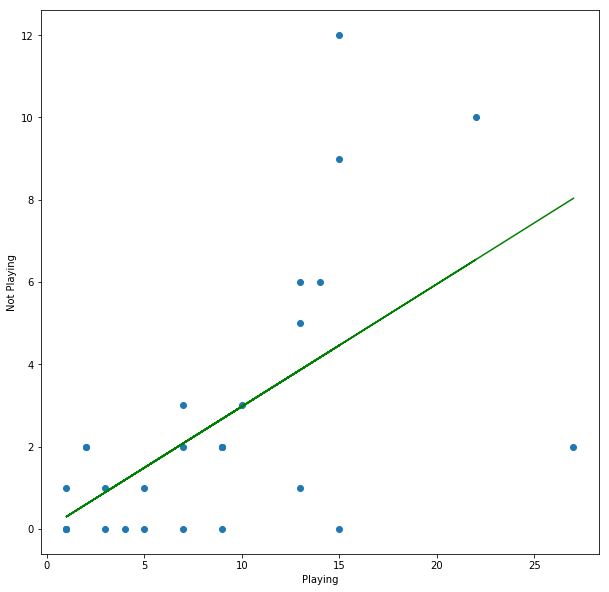

In [8]:
b = estimate_coefficients(data['Playing'], data['Not Playing'])

print("Regression model : y = (", data['Not Playing'].mean() - b[0]*data['Not Playing'].mean(), ') + (', b[0],')x')
print("Estimated coefficients:\nb_0 = {} \nb_1= {}".format(b[0], b[1]))
print("Coefficient of determination : ", b[2])

plot_regression_line(data['Playing'], data['Not Playing'], 'Playing', 'Not Playing', b)

The regression models show us that total user has a direct variation to both those who played basketball and those who didn't.(Since both variables are subsets of total user)